## A Study on Education Levels and Salary ##

### Introduction ###

Many students complete post-secondary education to pursue their passions and achieve financial stability in the future. Knowing this, we decided to research how salaries between software engineers and data analysis differ as well as how salaries between workers graduated with a master and bachelor degree differ from one another.

To understand better on the differences we wanted to research, we chose to study the "Salary dataset based on country and race" dataset from Kaggle. The dataset contains nine variables, however we will only be focusing on Education Level and Job Title and Salary for this study, specifically focusing on software engineers, data analysts, and students who have graduated with master or bachelor degrees.
Before starting our analysis on the dataset we decided to study on some references related to our research.

According to one of our references, the Bureau of Labor Statistics, workers with a master's degree have a higher salary than those with a bachelor's degree, exactly nearly 252 dollars per week (Hess, 2021). Another reference from the National Association of Colleges and Employers also suggests that despite the salary differences between Master and Bachelor is diminishing, they still discussed how the salary of workers that graduated with a master degree earns more than those with a bachelor degree (Gary, 2022). Since the two references above suggest that people who hold a master degree earns more than one that holds a bachelor degree, we decided to research if workers with a master degree earns more than the workers with a bachelor degree. 

From our reference, it mentions how a software developer with extensive experience typically commands a higher average salary ($23,000) than a data scientist possessing equivalent expertise and qualifications, which is implicated by data from Robert Half’s Salary Guide(Gupta, 2020). While a reference from IntelliPaat suggests that among workers from the US, no matter which level a person is working at, the salary of a data scientist is lower than a software developer. Since the two references above suggest contradicting reports on the difference in the salaries of a data scientist and software engineer, we decided to research the likelihood of the lack of similarity in the salaries between the two job titles.
To compare the difference in salaries between the difference in job titles and education levels within our research, we will start by studying the difference in means between software engineer and data analyst and the likelihood of workers of both jobs earning different salaries.

We decided to focus on North America only because other countries may have different compensation which would affect the accuracy of our analysis. Since UBC is a Canadian university, focusing on North America can teach us about the relationship between education and different occupations. This will be helpful for UBC students during their job search in the future.

In [15]:
# Loading necessary packages into R:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(taxyvr)
library(cowplot)

#### Preliminary Results ####

In [16]:
# Reading our dataset into R
data <- read.csv("https://raw.githubusercontent.com/mikkielynn/STAT-201-PROJECT/main/Salary_Data_Based_country_and_race.csv") %>%
    filter(Country == "Canada" | Country == "USA") %>%
    filter(!is.na(Salary)) %>%
    filter(!is.na(Education.Level)) %>%
    filter(!is.na(Job.Title))

colnames(data)[1] = "Observation"
head(data)
print("This data holds the countries in which our research will be based as well as values within columns of Education.Level, Job.Ttitle and Salary that doesn't have a NA value")
print(paste("The number of rows in this data is ",nrow(data)))

Observation Age Gender Education.Level Job.Title         Years.of.Experience
1 1           28  Female Master's        Data Analyst       3                 
2 2           45  Male   PhD             Senior Manager    15                 
3 3           36  Female Bachelor's      Sales Associate    7                 
4 4           52  Male   Master's        Director          20                 
5 5           29  Male   Bachelor's      Marketing Analyst  2                 
6 6           42  Female Master's        Product Manager   12                 
  Salary Country Race    
1  65000 USA     Hispanic
2 150000 Canada  White   
3  60000 USA     Hispanic
4 200000 USA     Asian   
5  55000 USA     Hispanic
6 120000 USA     Asian

[1] "This data holds the countries in which our research will be based as well as values within columns of Education.Level, Job.Ttitle and Salary that doesn't have a NA value"
[1] "The number of rows in this data is  2684"


In [17]:
# Tidying the data by filtering for experimental units by job title: software engineers, data analysts, and others 
a<-factor(data$"Job.Title" %in% c("Software Engineer","Data Analyst"))
data["matching"]=a
for (i in 1:nrow(data)){
  if(data[i,]["matching"]=="FALSE")
  {data[i,]["Job.Title"]="Others"}
  }
unique(data$Job.Title)  

[1] "Data Analyst"      "Others"            "Software Engineer"

In [18]:
# Grouping education levels into Bachelor's, Masters, and PhD students
data2 <- data |>
  select(-matching)

for (i in 1:nrow(data2)) {
  if(data2[i,]["Education.Level"] %in% c("Bachelor's","Bachelor's Degree"))
  {data2[i,]["Education.Level"]="Bachelor"}
  if(data2[i,]["Education.Level"] %in% c("Master's","Master's Degree"))
  {data2[i,]["Education.Level"]="Master"}
  if(data2[i,]["Education.Level"] %in% c("PhD","phD"))
  {data2[i,]["Education.Level"]="PhD"}
}

data3 <- data2|>
  mutate(education_job=paste(Education.Level,Job.Title))

In [19]:
# Complete salaries from USA and Canada, sorted in increasing salary 
salary_complete <- data3 %>%
    select(education_job,Salary,Country) %>%
    arrange(Salary)
head(salary_complete)
print("This table holds the salaries of workers with an education level from USA and Canada in an ascending order of salary")

education_job      Salary Country
1 Bachelor Others      350  USA    
2 Bachelor Others      500  USA    
3 High School Others 25000  USA    
4 High School Others 25000  Canada 
5 High School Others 25000  USA    
6 High School Others 25000  USA

[1] "This table holds the salaries of workers with an education level from USA and Canada in an ascending order of salary"


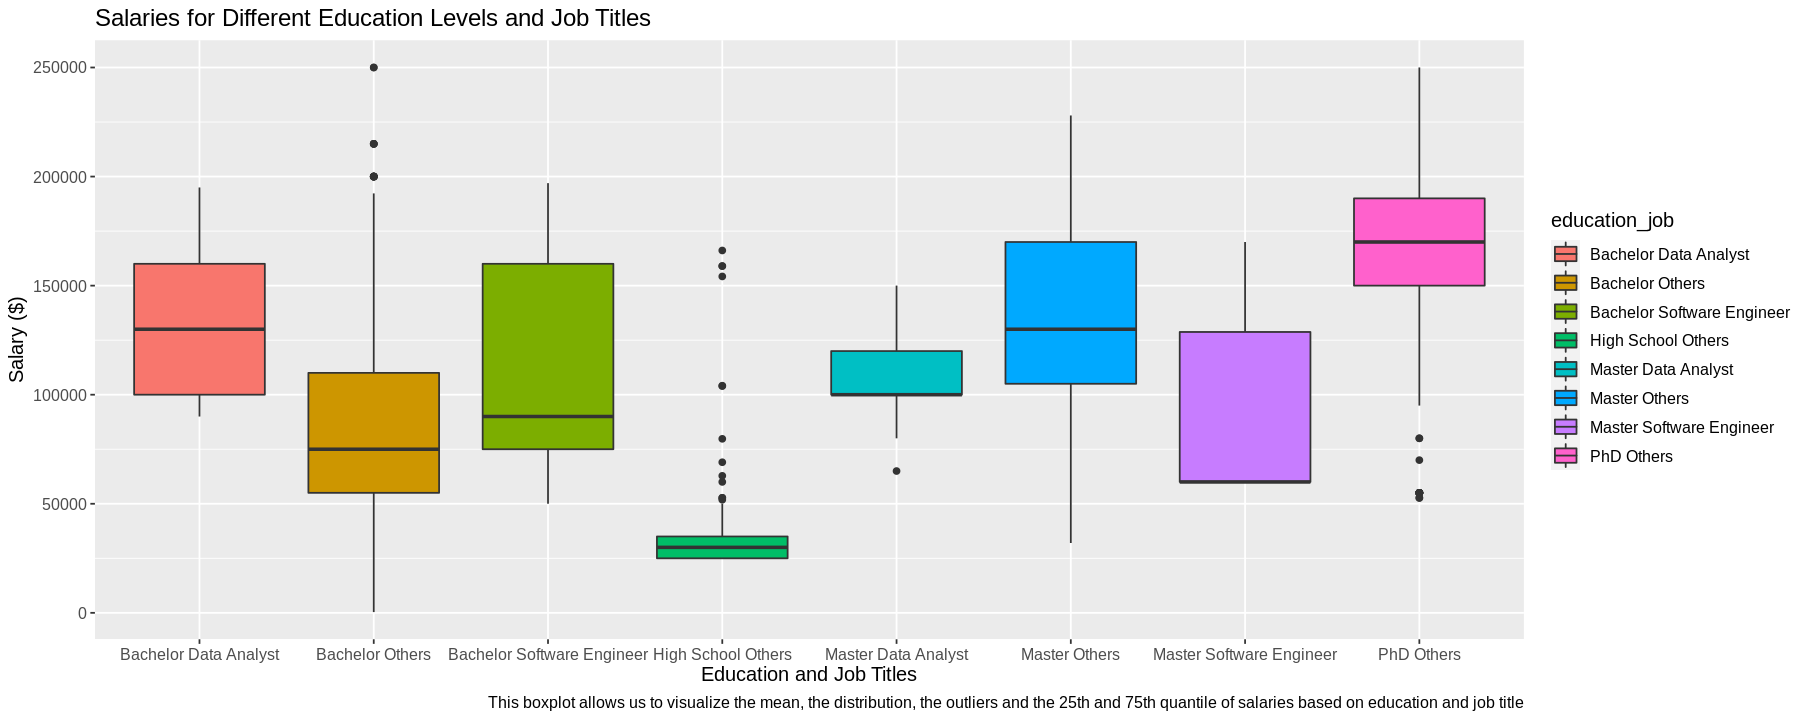

In [20]:
# Visualizing the spread and means using boxplots for the different groups
options(repr.plot.width = 15, repr.plot.height = 6)

salary_plot <- salary_complete %>%
    ggplot(aes(x = education_job,y = Salary), fill = education_job) +
    geom_boxplot(aes(fill = education_job)) +
    xlab("Education and Job Titles") +
    ylab("Salary ($)") +
    ggtitle("Salaries for Different Education Levels and Job Titles") +
    theme(text = element_text(size = 12))+
    labs(caption="This boxplot allows us to visualize the mean, the distribution, the outliers and the 25th and 75th quantile of salaries based on education and job title")
salary_plot

In [21]:
# Final dataframe containing separate job titles and their corresponding education levels
summary_data_set <- salary_complete |>
  filter(Salary != "NA") |>
  group_by(education_job)|>
  summarise(Salary=mean(Salary)) |>
  arrange(Salary)
summary_data_set
print("This table shows the mean of salaries base on education level and job title")

education_job              Salary  
1 High School Others          35259.1
2 Bachelor Others             85136.0
3 Master Software Engineer    97187.5
4 Master Data Analyst        107258.1
5 Bachelor Software Engineer 114899.5
6 Master Others              133002.3
7 Bachelor Data Analyst      133354.5
8 PhD Others                 165679.8

[1] "This table shows the mean of salaries base on education level and job title"


In [22]:
# Computing proportion of means based on the group with the lowest salary
low <- min(summary_data_set$Salary)

proportion <- summary_data_set |>
    mutate(salary_ratio = Salary/low)
proportion
print("This table shows ratio of the mean of salaries based on job title and education level against the one with the lowest mean of salary")

education_job              Salary   salary_ratio
1 High School Others          35259.1 1.000000    
2 Bachelor Others             85136.0 2.414582    
3 Master Software Engineer    97187.5 2.756381    
4 Master Data Analyst        107258.1 3.041997    
5 Bachelor Software Engineer 114899.5 3.258719    
6 Master Others              133002.3 3.772142    
7 Bachelor Data Analyst      133354.5 3.782131    
8 PhD Others                 165679.8 4.698924

[1] "This table shows ratio of the mean of salaries based on job title and education level against the one with the lowest mean of salary"


In [23]:
set.seed(4759)

# Tidying data into Bachelor and Master education level
bach_mast <- data2 %>% 
    filter(Education.Level %in% c("Bachelor", "Master")) %>%
    select(Education.Level, Job.Title, Salary) 
head(bach_mast)


Education.Level Job.Title    Salary
1 Master          Data Analyst  65000
2 Bachelor        Others        60000
3 Master          Others       200000
4 Bachelor        Others        55000
5 Master          Others       120000
6 Master          Others       130000

In [24]:
# Taking the sample
clean_sample <- bach_mast %>% 
    group_by(Education.Level) %>% 
    sample_n(size = case_when(Education.Level == "Bachelor" ~ 50,
                              Education.Level == "Master" ~ 50), 
             replace = FALSE) %>% 
    ungroup()

head(clean_sample)
nrow(clean_sample)


Education.Level Job.Title         Salary
1 Bachelor        Others             35000
2 Bachelor        Others             40000
3 Bachelor        Software Engineer  70000
4 Bachelor        Others             64182
5 Bachelor        Others            160000
6 Bachelor        Others             55000

[1] 100

### Analysis ###

Our first hypothesis testing is testing the mean salary of software engineers and data analysts:

Let $μ1$ be Software Engineer\
Let $μ2$ be Data Analyst

Hypothesis test:\
H0: $μ1$ = $μ2$\
H1: $μ1$ ≠ $μ2$

We will first conduct our hypothesis test following assumptions of the Central Limit Theorem. This is achieved by creating a null distribution where we resample without replacement. This will generate a sampling distribution of means (diff in means) where we can obtain our p-value to determine whether our observation is "extreme" enough to reject the null hypothesis.

[1] "The number of rows in this data is  157"


lower_ci  upper_ci stat     p_value
1 -14054.12 13407.39 -18235.4 0.0106

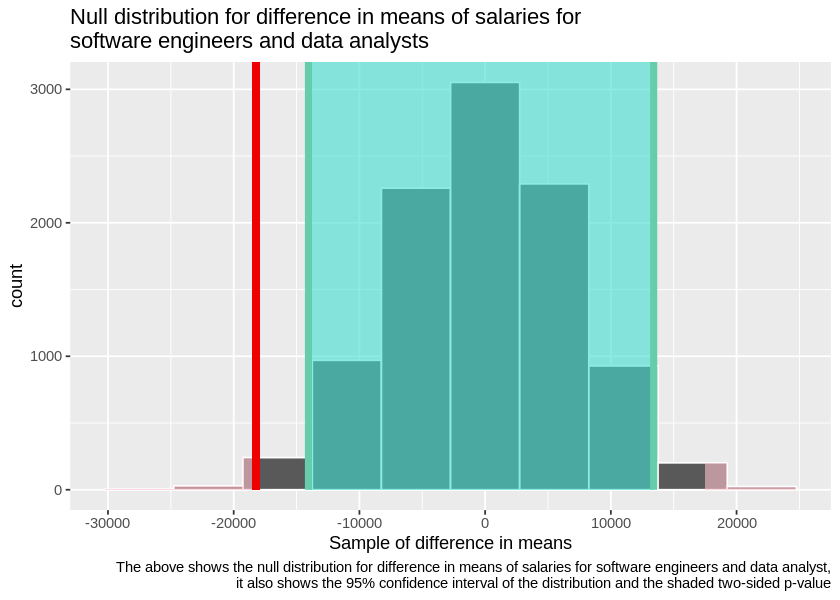

In [25]:
options(repr.plot.height = 5, repr.plot.width = 7)
set.seed(1234)

# Filtering observations with software engineers and data analysts
se_da <- data2 %>%
    filter(Job.Title == c("Software Engineer", "Data Analyst"))
print(paste("The number of rows in this data is ",nrow(se_da)))

# Creating null distribution for difference in means
null_dist1 <- se_da %>% 
    specify(Salary ~ Job.Title) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("Software Engineer", "Data Analyst"))

# Calculating the 95% confidence interval
null_dist1_ci <- null_dist1 %>%
                get_ci(level=0.95,type="percentile")

# Calculating the observed difference in means
obs_diff_means <- se_da %>% 
  specify(Salary ~ Job.Title) %>% 
  calculate(stat = "diff in means", order = c("Software Engineer", "Data Analyst"))

# Generating the visualization for the null distribution for difference in means
visualize(null_dist1, bins = 10) +
  shade_p_value(obs_stat = obs_diff_means, direction = "both")+
  shade_ci(endpoints=null_dist1_ci) +
  ggtitle("Null distribution for difference in means of salaries for \nsoftware engineers and data analysts")+
  xlab("Sample of difference in means")+
  labs(caption="The above shows the null distribution for difference in means of salaries for software engineers and data analyst,\nit also shows the 95% confidence interval of the distribution and the shaded two-sided p-value")

# Calculating the p-value for this null distribution with the observed difference in means
p_value_dist1 <- null_dist1 %>% 
          get_p_value(obs_stat = obs_diff_means, direction = "both")

# Creating a table of summaries with values we would be interested in studying
summary_dist1 <- cbind(null_dist1_ci,obs_diff_means) %>%
                 cbind(p_value_dist1)
summary_dist1

  
 
On our second research, we will be researching if workers with a Master's degree earns more than the workers with a Bachelor's degree. To do this, we will be comparing the observed means and confidence interval of the bootstrap distribution between the two different education levels.

[1] "The number of row in this data is  767"


degree_title lower_ci upper_ci observed_mean
1 Master       128160.8 134082.8 131214.7

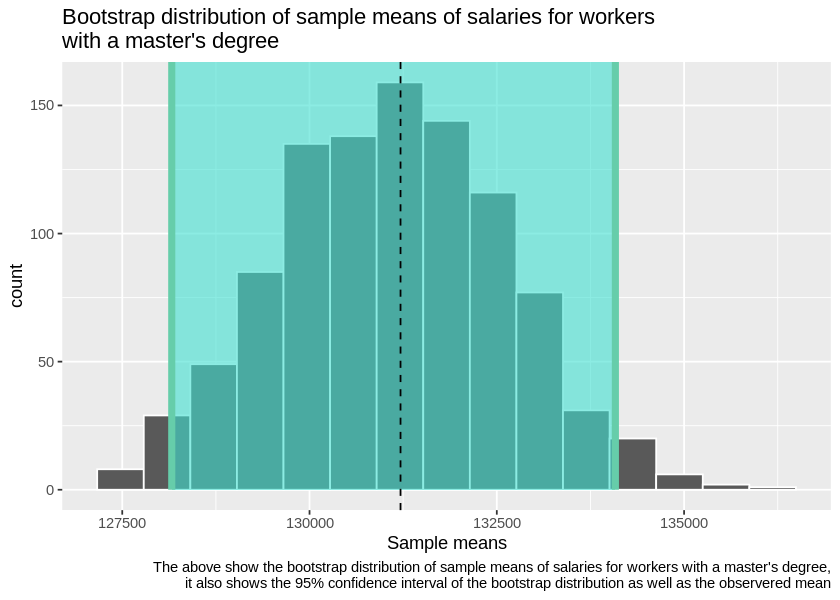

In [26]:
# generating Master's degree bootstrapping sampling distribution
master_only <- bach_mast %>%
    filter(Education.Level == "Master")
print(paste("The number of row in this data is ",nrow(master_only)))

boot_master <- master_only %>%
    specify(response = Salary) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

# generating confidence interval
master_ci <- boot_master %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

# Mean salary of all Master students from the original sample data
obs_master_mean <- master_only %>%
    filter(Salary != "NA") %>%
    select(Salary) %>%
    pull() %>%
    mean()

# Adding values of interest for our research into a summary table
obs_master_mean_tibble <- tibble(obs_master_mean)

degree_title <- "Master"
degree_title_tibble1 <- tibble(degree_title)
master_summary <- cbind(degree_title_tibble1,master_ci,obs_master_mean_tibble) %>%
                    mutate(observed_mean=obs_master_mean) %>%
                    select(-obs_master_mean)
master_summary

# visualizing bootstrap distribution with confidence interval shaded and obs_master_mean added
masters_bootstrap <- visualize(boot_master) +
    shade_confidence_interval(endpoints = master_ci) +
    geom_vline(xintercept = obs_master_mean, linetype = "dashed") +
    ggtitle("Bootstrap distribution of sample means of salaries for workers \nwith a master's degree") +
    xlab("Sample means") +
    labs(caption="The above show the bootstrap distribution of sample means of salaries for workers with a master's degree,\nit also shows the 95% confidence interval of the bootstrap distribution as well as the observered mean")
masters_bootstrap

[1] "The number of row in this data is  1220"


degree_title lower_ci upper_ci observed_mean
1 Bachelor     92051.83 96706.41 94338.44

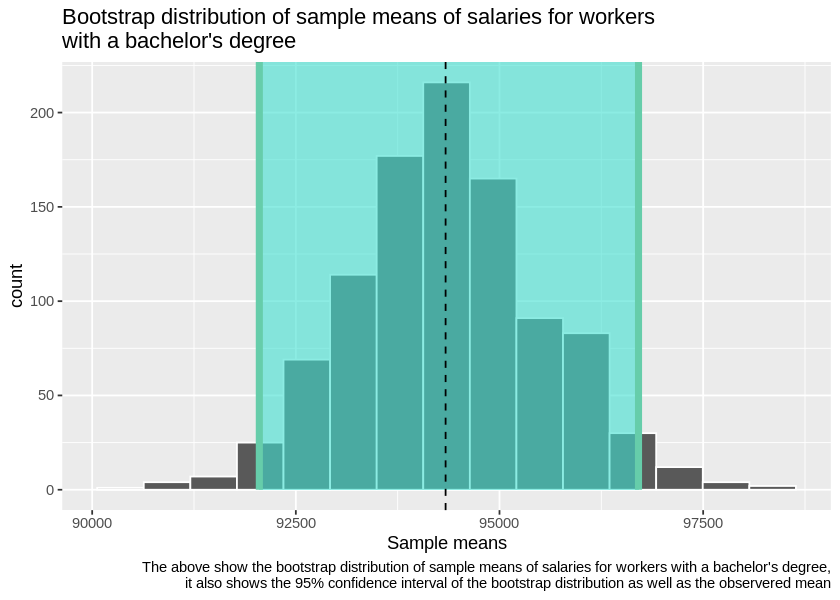

In [27]:
### generating Bachelor's degree bootstrapping sampling distribution
bach_only <- bach_mast %>%
    filter(Education.Level == "Bachelor")
print(paste("The number of row in this data is ",nrow(bach_only)))

boot_bach <- bach_only %>%
    specify(response = Salary) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

# generating confidence interval
bach_ci <- boot_bach %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

# Mean salary of all Master students from the original sample data
obs_bach_mean <- bach_only %>%
    filter(Salary != "NA") %>%
    select(Salary) %>%
    pull() %>%
    mean()

# Adding values of interest for our research into a summary table
obs_bach_mean_tibble <- tibble(obs_bach_mean)

degree_title <- "Bachelor"
degree_title_tibble2 <- tibble(degree_title)
bach_summary <- cbind(degree_title_tibble2,bach_ci,obs_bach_mean_tibble) %>%
                    mutate(observed_mean=obs_bach_mean) %>%
                    select(-obs_bach_mean)
bach_summary

# visualizing bootstrap distribution with confidence interval shaded and obs_master_mean added
bachelor_bootstrap <- visualize(boot_bach) +
    shade_confidence_interval(endpoints = bach_ci) +
    geom_vline(xintercept = obs_bach_mean, linetype = "dashed") +
    ggtitle("Bootstrap distribution of sample means of salaries for workers \nwith a bachelor's degree") +
    xlab("Sample means") +
    labs(caption="The above show the bootstrap distribution of sample means of salaries for workers with a bachelor's degree,\nit also shows the 95% confidence interval of the bootstrap distribution as well as the observered mean")
bachelor_bootstrap

degree_title lower_ci  upper_ci  observed_mean
1 Bachelor      92051.83  96706.41  94338.44    
2 Master       128160.80 134082.79 131214.72

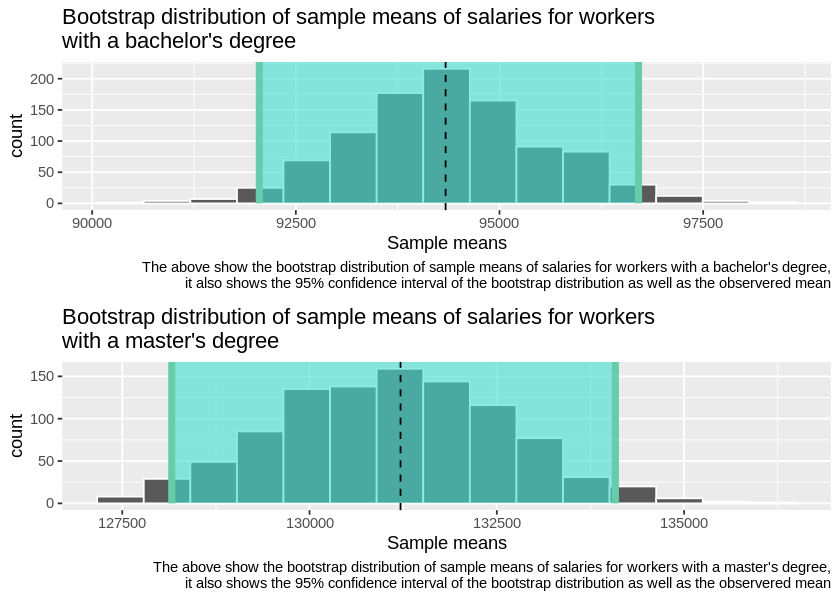

In [28]:
require(gridExtra)

grid.arrange(bachelor_bootstrap, masters_bootstrap)
rbind(bach_summary,master_summary)

### Methods and Results ###

**_Data exploration:_**

Before we started our exploration of the data, we needed to tidy our data first. We decided to filter observations from the United States of America and Canada. We also changed job titles that are not “software engineer” or “data analyst” into “others” since we aren’t interested in job titles that are outside our research focus. Afterward, we changed the characters within education levels in order to group them into “Bachelor”, “Master” and “PhD”.
Through our exploration of the dataset that we will be using within this research, we learnt that it has 6703 observations. Knowing this, we confirm that our data is sufficiently large enough to apply the Central Limit Theorem that can provide us accurate estimates (the data has 2684 observations) . Knowing that our analysis is reliable, we decided to standardize our estimates by scaling the proportions of the mean salaries relative to the lowest salary in the dataset. This normalization of the salaries can help mitigate the influence of extreme values or outliers within our data and hence improve our comparison of salaries as it removes the concern of the wider range produced by them.

To better visualize our comparison, we made a boxplot to compare the salaries for different education levels and job titles. From the boxplot, we are able to observe the mean and spread and 25th and 75th percentiles of the data for different education levels. Focusing on the salaries for those within Bachelor and Master degrees as well as data analysts and software engineers, we can observe that for both data analyst and software engineers, bachelor workers seem to be earning more than master workers. This can be further proven as we analyze this on a chart organized by their mean salary. However, a conclusion shouldn’t be drawn from this exploration as we are researching based on education level and job titles separately.

**_Hypothesis test 1: Difference in means of salary between software engineers and data analysts_**

For our first hypothesis test, we will test the likelihood of the difference in the mean salaries of software engineers and data analysts to be equal. For this test, our null hypothesis will be that both mean salaries are equal to one another. As for our alternate hypothesis, it will be that the mean salaries for both job titles will be not equal to one another. 

To decrease the likelihood of us making a type I or II errors, we decided to set our confidence interval at 95% and a 5% significance level, this is because we wanna balance between our probability of both errors. We decided on the 95% confidence interval to have a lower chance of committing type I error as we don’t want to have a conclusion too weak to conveniently conclude that the null hypothesis is true, we also believe this level of confidence interval isn’t high enough for us to make a type II error as well.

As mentioned earlier, since the dataset we will be researching on has more than sufficient observations to assume the Central Limit Theorem will provide us accurate estimates, we decided to generate 10000 bootstrap samples of a sample that contains the observations with job titles of software engineers and data analysts (this gives us a sample size of 198), we then calculate the difference in means of salaries between software engineers and data analysts. We also kept the size of the bootstrap samples to be the same size as the sample to get a better estimate of the difference in means than a smaller sample would get. 10000 bootstrap samples are generated to study the bootstrap distribution of the difference in means with bin width of 10 as we observed that these values give the right amount of samples to properly study the bootstrap distribution.

To study the likelihood of the difference in the mean salaries of software engineers and data analysts to be equal, we generated the confidence interval of the bootstrap 
distribution, observed difference in means and the p-value:

| Lower confidence interval | Upper confidence interval | Observed difference in means | p |
|-----------|----------|----------|-------|
| -14054.12 | 13407.39 | -18235.4 | 0.0106 |

From the table above, since the p-value is below the significance level of 5%, we can reject the null hypothesis with a 95% confidence interval. Hence, we fail to reject the alternative hypothesis that the mean salaries of software engineers and data analysts are not equal to one another.

**_Hypothesis test 2: Means of salary of workers with master's degree being larger than ones with bachelor’s degree_**

For our second hypothesis test, we will test the likelihood of the mean of salaries for workers with a master degree being higher than the workers with a bachelor degree. For this test, the null hypothesis will be that the mean of salaries of workers with a master's degree will be the same as the mean of salaries for workers with a bachelor’s degree. The alternate hypothesis for this test will be that workers with a master degree have a higher mean of salaries than those with a bachelor’s degree.

Similar to our last hypothesis test, we opted for the same confidence interval level as well as significance level in order to balance between the probability of a type I and II errors and have a lower probability of falsely concluding that the null hypothesis is true.

However, unlike the past hypothesis test, we decided to create two bootstrap distributions of sample means, one with the bootstrap distribution of sample means of workers’ salaries with a master’s degree, another one with the bootstrap distribution of sample means of workers’ salaries with a bachelor’s degree.

For the bootstrap distributions, 1000 bootstrap samples are created for both education levels. This is because the sample size for workers with a master’s degree (768) and for workers with a bachelor’s degree (1222) are much higher than those from the previous hypothesis test and from our observation that this amount of samples are enough to properly observe and study both bootstrap distributions of sample means. This also means that the central limit theorem could still provide us with accurate estimates.

After generating the bootstrap distributions of sample means, the confidence intervals and observed means for both bootstrap distributions are calculated and compared with one another.

| Education level | Lower confidence interval | Upper confidence interval | Observed mean|
|----------|----------|----------|----------|
| Bachelor | 92072.72 | 96792.86 | 94338.44 |
| Master | 128383.26 | 134266.15 | 131214.72 |

From the table above, not only are the observed means from both education levels apart by 36876.28 . The lower confidence interval for salaries from workers with a master’s degree is 31590.4 apart from the upper confidence interval for salaries from workers with a bachelor’s degree. This greatly suggests that workers with a master’s degree earn more than workers with a bachelor’s degree.


### Discussion ###

From the researches above, we were able to find differences between salaries for workers with a master's degree and a bachelor's degree as wellm as differences between software engineers' salaries and data analysts'. 

Starting with the difference in means of salary between software engineers and data analysts, we were able to see a large range of distribution between -12043.29 and 11483.03, we were also able to calcualte the likelihood of the null hypothesis being true and was able to reject it under a 5% significance level with a p-value of 0.0106.

For our second research, we were able to find that workers' with a master's degree earns more than those with a bachelor's degree. This can be concluded from how the observed mean are greatly different from one another and how the lower confidence interval for master's degree is far apart from the upper confidence interval for bachelor's degree.

Although a student could draw a conclusion of master's degree giving a better salary and the lack of difference between the salaries of software engineers and data analysts. But the data used in this research doesn't include the years of experience the workers have, their race and geneder which may affect one's salary. This could also lead to potential questions that can be asked from this research such as _How does different gender or race affect one's salary_ or _does more years of experience influences one's salary?_.


#### References ####

2147234, S. P. (2023, July 6). Salary dataset based on country and race. Kaggle. https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

Government of Canada, Statistics Canada. (2017, November 29). Census in Brief: Does education pay? A comparison of earnings by level of education in Canada and its provinces and territories. https://www12.statcan.gc.ca/census-recensement/2016/as-sa/98-200-x/2016024/98-200-x2016024-eng.cfm

Torpey, E. (2018, April). Measuring the value of education : Career outlook. Measuring the Value of Education. https://www.bls.gov/careeroutlook/2018/data-on-display/education-pays.htm

Hess, A. J. (2021, September 24). The master’s degrees that give the biggest salary boost-up to 87% more money. CNBC. https://www.cnbc.com/2021/09/24/the-masters-degrees-that-give-the-biggest-salary-boostup-to-87percent.html

Gray, K. (2022, December 5). Differential in starting salaries between bachelor’s and master’s grads is diminishing. https://www.naceweb.org/job-market/compensation/differential-in-starting-salaries-between-bachelors-and-masters-grads-is-diminishing/

Intellipaat Blog. (2023, June 13). Data Science vs Software Engineer: What to choose and why? https://intellipaat.com/blog/data-science-vs-software-engineering/?US

Gupta, S. (2020, July 8). Who earns more: Software engineers or data scientists? - springboard. Who Earns More: Software Engineers or Data Scientists? https://www.springboard.com/blog/software-engineering/data-scientist-software-engineer-salary/
